In [1]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("file.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MTEQR
TK
YADSILTTK
SPYEATETIR
IR
LSQVK
LLNK
DFYLLFK
ELANLK
R
NYAQQLR
K
IIAENEDITK
ILNAQMIESNVLTPQEMSAFR
FNSLGELR
NVWDTVIEELK
SDLK
SSTEYYNTLDQQVVR
ELK
ESVENNTSWR
ESK
DLHSK
LSK
NAASIEHYSK
NNENSSHLEEAR
R
QWDQQSPYLFELFETIDYNR
LDTLK
NCMLR
FQTSFSDYLLNTTK
ECETVMTK
FLAFEPQSEIDR
FAK
DASQYNFQLSSSSK
EVVPNNASPASATGARPVSVSNGAANTER
EK
K
SPQK
DK
R
K
SAFGNIGHR
LASASSSLTHNDLMNNEFSDSTNNSSLK
SK
K
SSHTLR
SK
VGSIFGR
NK
TK
NK
R
QQQSSSNSHIQASITETPNNSSTR
VSSTATSSIYQK
QR
RPTYSSSK
SNNWTPGEASDTPPLPPHATPK
NVDAPVTADTPPAQTFTPSEVPPSTPQQSSPPTAK
EPDSSNLPK
TVPISISQPPLQPQSK
TKPLPVEPASPSISLPTATVDNQPSGQVDSRPLHIR
APALPPSR
K
QNFIHNR
DSQLYDSLPNHGSGATPTSSSLSSIPQERPVSTLSSQITGELR
ELNPQATGSSTSLVGQSLFQHSSLDTSQFGLNASIAEVLNASFK
DGMLQNSQLIGEIALNYLPNSVMNSPLPIGINLR
INNGAK
FEK
VILNQAFIER
VAPEEFK
VNPSFIDSR
TLGAIK
YSIK
EPIAPIVIHPVWR
FESHQASVVLTVK
MSPSLPDEISQIVIEDLVVFVNIDGANATSALSKPQGSFSK
EK
K
R
ITWR
FK
EPVVLTR
NGEGQR
LIAR
FITDGLAHESAK
GVITK
FTISETDNVALPHSGAGSGITLTCQELDENNPFGGEWLDVNTK
R
TLTTGNYHGLA


In [2]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("file.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of MTEQR has 25 peaks.
b2-H2O1+ is generated at m/z 84.044390626271
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b3-H2O1+ is generated at m/z 213.08698484957097
b2+ is generated at m/z 233.095440707171
y2-C1H2N1O1+ is generated at m/z 259.1638921047711
y2-C1H2N2+ is generated at m/z 261.15573310477106
y2-H3N1+ is generated at m/z 286.1509820728711
y2+ is generated at m/z 303.1775311685711
b4-H2O1+ is generated at m/z 341.145563104771
b4-H3N1+ is generated at m/z 342.129579072871
b3+ is generated at m/z 362.138034930471
y3-C1H2N1O1+ is generated at m/z 388.2064863280711
y3-C1H2N2+ is generated at m/z 390.19832732807106
y3-H2O1+ is generated at m/z 414.20956032807106
y3-H3N1+ is generated at m/z 415.1935762961711
y3+ is generated at m/z 432.2201253918711
y4-C1H2N1O1+ is generated at m/z 489.25416555137105
b4+ is generated at m/z 490.1966

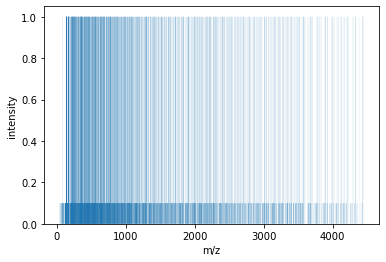

In [3]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

In [4]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[0]

In [5]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(theo_spectrum, peptide, 1, 1)

40.018175498671
6934.325783934568


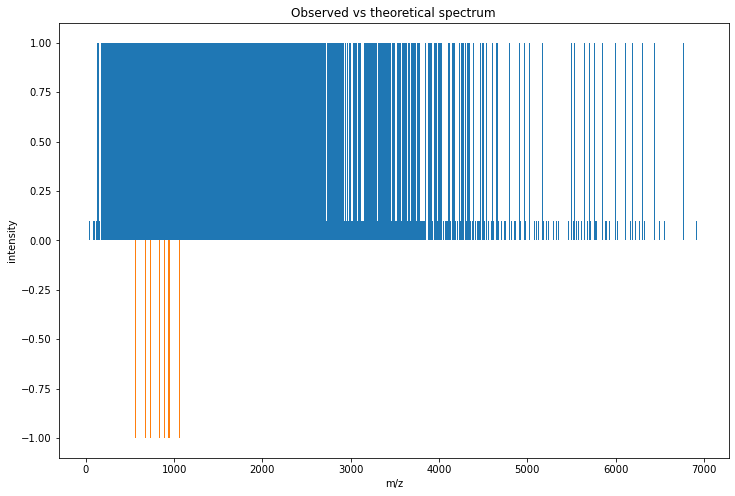

In [6]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()
print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)



In [7]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)


In [8]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 18
ion	theo. m/z	observed m/z
y2+	1	203.139020040971	203.102634913371
b2+	1	215.139020040971	215.139020040971
y3+	1	260.16048413667096	260.147908072871
b3+	1	316.186699264271	316.18669926427106
y4+	1	397.219396359971	397.208163359971
b4+	1	417.234378487571	417.23437848757106
b5+	1	474.25584258327103	474.2558425832711
y5+	1	560.282725647071	560.2827256470711
b6+	1	588.2987707746711	588.298770774671
y6+	1	674.325653838471	674.3290246960709
y7+	1	731.347117934171	731.347117934171
b7+	1	751.3621000617711	751.362966649371
y8+	1	832.394797157471	832.394797157471
b8+	1	888.4210122850711	888.425034285071
y9+	1	933.4424763807709	933.449869238371
b9+	1	945.4424763807712	945.446498380771
y10+	1	1046.5265407316708	1046.526540731671
b10+	1	1058.526540731671	1058.529911589271


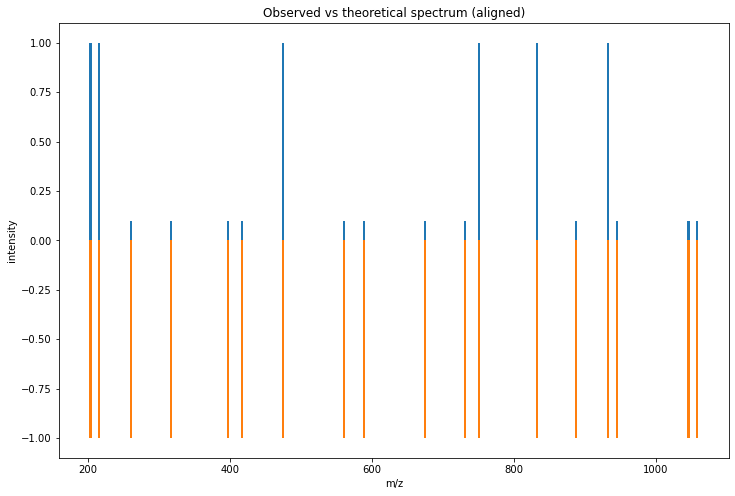

In [9]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)